In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

train = pd.read_csv('/Users/calvin/python/crime project/20181127.csv')
train1 = pd.read_csv('/Users/calvin/python/crime project/submission0830.csv')
train=pd.concat([train,train1])
print(train)

     Year  Weekdays  Time  event count
0    2017         1     1            4
1    2017         1     2            1
2    2017         1     3            2
3    2017         1     4            3
4    2017         1     5            1
5    2017         1     6            4
6    2017         1     7            2
7    2017         1     8            2
8    2017         2     1            0
9    2017         2     2            3
10   2017         2     3            0
11   2017         2     4            1
12   2017         2     5            2
13   2017         2     6            3
14   2017         2     7            2
15   2017         2     8            3
16   2017         3     1            6
17   2017         3     2            2
18   2017         3     3            1
19   2017         3     4            5
20   2017         3     5            1
21   2017         3     6            3
22   2017         3     7            2
23   2017         3     8            5
24   2017         4     1

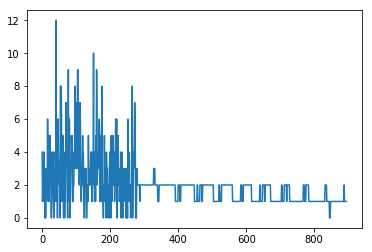

In [241]:
plt.figure(0)
plt.plot(np.arange(len(train["event count"])),train["event count"])

In [242]:
import random

a=train[train["Year"]<=2012]["event count"]+np.random.rand(len(train[train["Year"]<=2012]["event count"]))*3

index_b=train[train["Year"]<=2012].index
train.iloc[index_b,3]=a

print(train)

     Year  Weekdays  Time  event count
0    2017         1     1     2.902922
1    2017         1     2     3.731200
2    2017         1     3     2.670060
3    2017         1     4     2.520519
4    2017         1     5     2.953756
5    2017         1     6     4.938878
6    2017         1     7     4.581747
7    2017         1     8     3.588127
8    2017         2     1     2.083274
9    2017         2     2     4.270688
10   2017         2     3     4.625306
11   2017         2     4     3.066543
12   2017         2     5     3.792598
13   2017         2     6     2.367465
14   2017         2     7     4.446009
15   2017         2     8     2.714333
16   2017         3     1     4.899056
17   2017         3     2     2.314187
18   2017         3     3     2.353682
19   2017         3     4     2.719516
20   2017         3     5     4.706566
21   2017         3     6     4.860993
22   2017         3     7     2.744226
23   2017         3     8     4.677794
24   2017         4     1

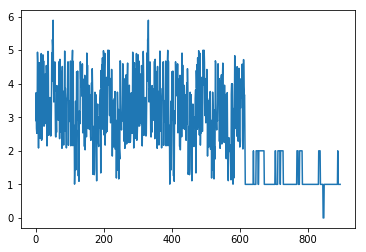

In [243]:
plt.figure(1)
plt.plot(np.arange(len(train["event count"])),train["event count"])

In [244]:
# train_x.dropna(axis=0, how='any')
train=pd.get_dummies(train)
# train_x=pd.get_dummies(test_x)
train.dropna(axis=0, how='any')


# print(type(train))
# print(train.shape)
# print(train)

,Year,Weekdays,Time,event count
0,2017,1,1,2.902922
1,2017,1,2,3.731200
2,2017,1,3,2.670060
3,2017,1,4,2.520519
4,2017,1,5,2.953756
5,2017,1,6,4.938878
6,2017,1,7,4.581747
7,2017,1,8,3.588127
8,2017,2,1,2.083274
9,2017,2,2,4.270688


In [245]:
# train=pd.concat([train1, train2,train3,train4,train5,train6,train7], axis=0,ignore_index = True)
test=train[train["Year"]==2017]
# print(test)
test_y=test['event count']
test_x=test.drop(columns=["event count"])
test_y.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
test_y=np.array(test_y)
# print(type(test_x))
# print(type(test_y))

train=train.drop(train[train["Year"]==2017].index)
train_y=train['event count']
train_x=train.drop(columns=["event count"])

test_y=test_y.astype(np.int)
train_y=train_y.astype(np.int)
print(train_y)
# test_x, test_y -> testing set
# train_x -> training set & validation set feature
# train_y -> label of training and validation set

56     4
57     3
58     2
59     2
60     3
61     2
62     3
63     3
64     3
65     3
66     2
67     3
68     3
69     4
70     2
71     4
72     2
73     4
74     2
75     4
76     3
77     2
78     4
79     2
80     3
81     3
82     2
83     3
84     3
85     4
      ..
586    1
587    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    1
598    1
599    1
600    1
601    1
602    1
603    1
604    1
605    1
606    1
607    1
608    2
609    1
610    1
611    1
612    1
613    1
614    1
615    1
Name: event count, Length: 784, dtype: int64


In [246]:
#seperate the dataset----------------------------------------------------------
#case 1

#training set
# train_x=train_x.values
# train_y=train_y.values
# train_y=train_y.reshape(-1,1)
# test_x=test_x.values
# test_y=test_y.values
# test_y=test_y.reshape(-1,1)

# train_x.dropna(axis=0, how='any')

print(max(train_y))

4


In [247]:

# 標準化
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x=scaler.transform(test_x)


#PCA---------------------------------------------------------------------------
pca_num=0
delta=0.1
pca=PCA(n_components = 0.999999)
train_x=pca.fit_transform(train_x)
test_x=pca.transform(test_x)
print(train_y.shape)
dimension=train_x.shape[1]
print(train_x)
print("train_x.shape=", train_x.shape)
print(test_y)
print(test_x.shape)

(784,)
[[ 1.64167971  1.52752523  1.5       ]
 [ 1.64167971  1.09108945  1.5       ]
 [ 1.64167971  0.65465367  1.5       ]
 ...
 [-1.54415419 -0.65465367 -1.5       ]
 [-1.54415419 -1.09108945 -1.5       ]
 [-1.54415419 -1.52752523 -1.5       ]]
train_x.shape= (784, 3)
[2 3 2 2 2 4 4 3 2 4 4 3 3 2 4 2 4 2 2 2 4 4 2 4 3 2 3 3 4 3 2 4 4 2 3 3 4
 4 2 2 3 2 3 2 2 2 3 4 4 5 5 5 4 3 3 3]
(56, 3)


In [250]:
print(train_x)
train.dropna(how="any")
# print(max(test_y))
print(np.max(train_x))

train_y=train_y.values
train_y=train_y.reshape(-1,1)  

[[ 1.64167971  1.52752523  1.5       ]
 [ 1.64167971  1.09108945  1.5       ]
 [ 1.64167971  0.65465367  1.5       ]
 ...
 [-1.54415419 -0.65465367 -1.5       ]
 [-1.54415419 -1.09108945 -1.5       ]
 [-1.54415419 -1.52752523 -1.5       ]]
1.641679714602351


0.7696047724331732
[[ 0.48368525  0.04879744 -0.31629951]]
[2.25354474]
y_LR_test = [[2.75775825]
 [2.73646131]
 [2.71516436]
 [2.69386741]
 [2.67257046]
 [2.65127351]
 [2.62997656]
 [2.60867961]
 [2.91590801]
 [2.89461106]
 [2.87331411]
 [2.85201716]
 [2.83072022]
 [2.80942327]
 [2.78812632]
 [2.76682937]
 [3.07405777]
 [3.05276082]
 [3.03146387]
 [3.01016692]
 [2.98886997]
 [2.96757302]
 [2.94627607]
 [2.92497913]
 [3.23220752]
 [3.21091057]
 [3.18961362]
 [3.16831668]
 [3.14701973]
 [3.12572278]
 [3.10442583]
 [3.08312888]
 [3.39035728]
 [3.36906033]
 [3.34776338]
 [3.32646643]
 [3.30516948]
 [3.28387253]
 [3.26257559]
 [3.24127864]
 [3.54850703]
 [3.52721008]
 [3.50591314]
 [3.48461619]
 [3.46331924]
 [3.44202229]
 [3.42072534]
 [3.39942839]
 [3.70665679]
 [3.68535984]
 [3.66406289]
 [3.64276594]
 [3.62146899]
 [3.60017205]
 [3.5788751 ]
 [3.55757815]]
finish, plot the scatter figure


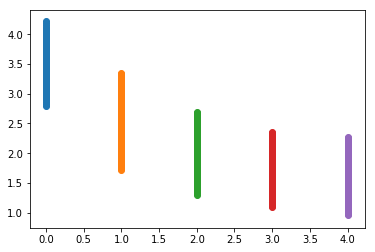

<Figure size 432x288 with 0 Axes>

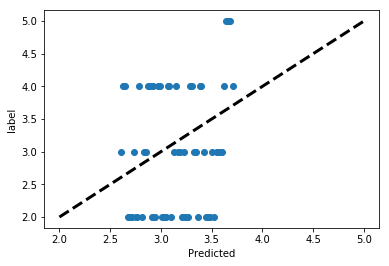

0.7696047724331732
[[ 0.48368525  0.04879744 -0.31629951]]
[2.25354474]


In [252]:
from sklearn import linear_model
K=5
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 




y_LR_test = LR.predict (test_x)
print("y_LR_test =",y_LR_test)
# y_LR_test=np.mean(y_LR_test)
print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_LR_test, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')
# plt.xlim((0,10))
# plt.ylim((0,10))

plt.show()   
plt.pause(0.1)
    
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

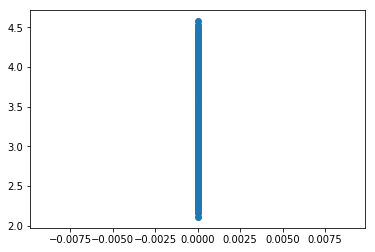

In [187]:
#Linear Regression
from sklearn import linear_model
K=5
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

[ 0.19069781  0.02978678  1.23590248 -0.43228562  0.97294904 -0.8517
 -1.17475084  1.74307927 -0.08622224 -0.20401852 -0.41284595 -0.76042973
 -0.6978617  -1.44701991 -0.24068245 -0.38946576 -0.03126152  0.02903408
 -0.11528575  0.15539036 -0.3322514   0.3614944   0.37059928 -0.49122273]
7.037224266876291
0.9415786701953877
35.111917342151344


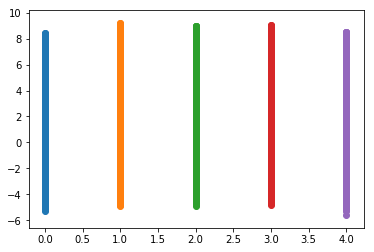

In [17]:
#kernel
degree=3
i=0
train_x_copy=train_x
for power in range(2,degree+1):
    i=i+1
    train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

#kernelridge
from sklearn.linear_model import RidgeCV
K=5
kf = KFold(n_splits=K)
RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    RR.fit(train_x[train_index],train_y[train_index])
    y_RR = RR.predict(train_x[test_index])

    plt.scatter(np.ones(y_RR.shape)*i,y_RR)
    i=i+1
    mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(RR.coef_)
print(RR.intercept_)
print(rmse)
print(RR.alpha_)

[-1.78021189e-01 -1.50338488e-01  1.71234474e+00  6.72227101e-02
  1.22122396e+00 -8.33622283e-01 -1.49794329e+00  1.89092997e+00
  1.39122959e+00  5.05859555e-01  6.89597779e-02  2.87016571e-01
 -5.53995104e-01  2.60278476e-01  8.22706729e-01 -5.96156382e-01
  1.11470933e-01  1.01050039e-01 -1.36528644e-01 -8.46437119e-02
 -1.64776857e-01  1.07913502e-01  2.64795979e-01 -2.10294129e-01
  1.39122959e+00  5.05859555e-01  6.89597779e-02  2.87016571e-01
 -5.53995104e-01  2.60278476e-01  8.22706729e-01 -5.96156382e-01
 -3.04520168e+00 -1.27730214e-02 -6.56926948e-01 -7.07021834e-01
  7.76282472e-01 -2.19005510e+00 -8.76464095e+00  1.31740347e+00
  1.02873543e+00 -2.84104910e-01  2.41493269e-01  1.47909214e-01
 -2.61911592e-01  9.75747887e-01  7.17440853e+00 -5.34269336e-01
  1.11470933e-01  1.01050039e-01 -1.36528644e-01 -8.46437119e-02
 -1.64776857e-01  1.07913502e-01  2.64795979e-01 -2.10294129e-01
  1.02873543e+00 -2.84104910e-01  2.41493269e-01  1.47909214e-01
 -2.61911592e-01  9.75747

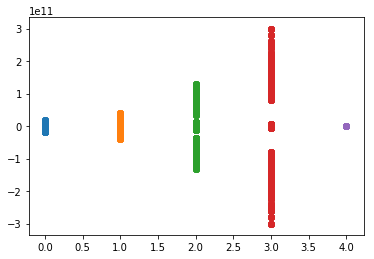

In [23]:
#kernel
degree=3
i=0
train_x_copy=train_x
for power in range(2,degree+1):
    i=i+1
    train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

#kernelridge
from sklearn.linear_model import RidgeCV
K=5
kf = KFold(n_splits=K)
RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    RR.fit(train_x[train_index],train_y[train_index])
    y_RR = RR.predict(train_x[test_index])

    plt.scatter(np.ones(y_RR.shape)*i,y_RR)
    i=i+1
    mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(RR.coef_)
print(RR.intercept_)
print(rmse)
print(RR.alpha_)

In [24]:
y_RR = LR.predict (test_x)
print("y_LR_test =",y_RR)

print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_RR, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')

NameError: name 'LR' is not defined